In [ ]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import torch.optim as optim
import numpy as np
import copy
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from PIL import Image

In [2]:
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
    print("Current CUDA Device ID:", torch.cuda.current_device())


PyTorch Version: 2.2.1+cu121
CUDA Available: False
CUDA Version: 12.1


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# from zipfile import ZipFile

# # Specify the zip file path
# zip_ref = ZipFile("/content/drive/MyDrive/CHM/breast.zip", 'r')

# # Extract all files to the current directory (you can specify a different path)
# zip_ref.extractall()

# zip_ref.close()

In [16]:
# import os
# from torchvision import transforms, datasets
# from torch.utils.data import DataLoader, SubsetRandomSampler
# import numpy as np
# import torch

# # Set the directory for the data
# data_dir = '/content/breast/classes/'

# # Define transformations
# transformations = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Initialize the dataset using ImageFolder
# dataset = datasets.ImageFolder(root=data_dir, transform=transformations)

# # Print out class names to verify
# print("Classes:", dataset.classes)

# # Splitting data indices for training, validation, and testing
# np.random.seed(42)
# indices = np.random.permutation(len(dataset))
# split_train = int(0.7 * len(indices))
# split_val = int(0.85 * len(indices))
# train_indices, val_indices, test_indices = indices[:split_train], indices[split_train:split_val], indices[split_val:]

# # Creating samplers for each set
# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)
# test_sampler = SubsetRandomSampler(test_indices)

# # Creating DataLoader for each set
# train_loader = DataLoader(dataset, batch_size=16, sampler=train_sampler)
# val_loader = DataLoader(dataset, batch_size=16, sampler=val_sampler)
# test_loader = DataLoader(dataset, batch_size=16, sampler=test_sampler)

# # Print out the number of samples in each set
# print("Number of training samples:", len(train_indices))
# print("Number of validation samples:", len(val_indices))
# print("Number of test samples:", len(test_indices))

Class weights: tensor([0.1772, 0.6154, 0.7207, 0.9412, 1.0667, 1.1268, 1.3223, 1.4159])
All images matched successfully.
Train set size: 1331
Validation set size: 420
Test set size: 330


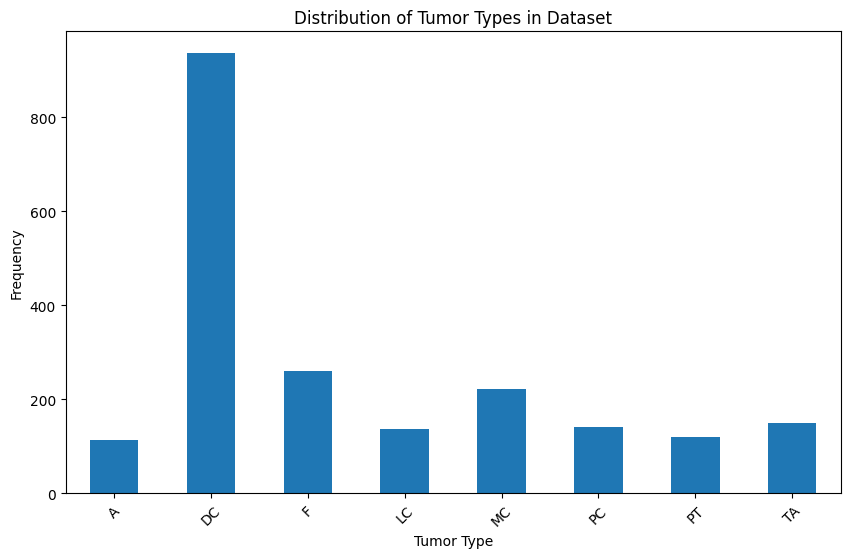

In [46]:
# import os
# import torch
# import numpy as np
# import pandas as pd
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
# from sklearn.model_selection import StratifiedShuffleSplit
# import matplotlib.pyplot as plt

# # Metadata loading and preprocessing
# metadata_path = '/content/breast/metadata.csv'
# metadata = pd.read_csv(metadata_path)

# # Calculate class weights based on TumorType in metadata
# def estimate_weights_mfb(label):
#     class_counts = metadata['TumorType'].value_counts()
#     class_weights = class_counts.median() / class_counts.reindex(label, fill_value=0)
#     return class_weights.values

# label = ['DC', 'F', 'MC', 'LC', 'TA', 'PC', 'PT', 'A']  # Classes as per metadata TumorType
# class_weights = torch.FloatTensor(estimate_weights_mfb(label))
# print("Class weights:", class_weights)

# # Define transformations
# transform_train = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(degrees=60),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# transform_test = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Initialize dataset
# data_dir = '/content/breast/classes/'
# dataset = datasets.ImageFolder(root=data_dir, transform=transform_train)

# data_labels = []
# unmatched_entries = []
# for img_path, _ in dataset.imgs:
#     # Split the path and extract the SlideID
#     filename = img_path.split('/')[-1]  # Gets 'SOB_B_A-14-22549AB-100-001.png'
#     slide_id = filename.split('-')[2]  # Split by '-' and get the fourth segment

#     # Find the matching entry in the metadata
#     metadata_entry = metadata[metadata['SlideID'] == slide_id]

#     if not metadata_entry.empty:
#         tumor_type = metadata_entry['TumorType'].values[0]
#         data_labels.append(tumor_type)
#     else:
#         unmatched_entries.append(slide_id)

# # Print the results of the matching process
# if unmatched_entries:
#     print(f"Warning: No metadata entries matched for {len(unmatched_entries)} images.")
#     print("Unmatched SlideIDs:", unmatched_entries)
# else:
#     print("All images matched successfully.")

# # Create Stratified Splits
# splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.36)
# for train_idx, temp_idx in splitter.split(dataset.imgs, data_labels):
#     pass  # temp_idx to be further split into validation and test

# # Split temp into validation and test
# temp_labels = [data_labels[i] for i in temp_idx]
# temp_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.44)  # 0.44 of 0.36 is 0.16 (test size)
# for val_idx, test_idx in temp_splitter.split(np.zeros(len(temp_labels)), temp_labels):
#     pass

# # Loaders
# batch_size = 10
# train_sampler = SubsetRandomSampler(train_idx)
# val_sampler = SubsetRandomSampler(val_idx)
# test_sampler = SubsetRandomSampler(test_idx)

# train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
# val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)
# test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

# # Output sizes
# print(f"Train set size: {len(train_idx)}")
# print(f"Validation set size: {len(val_idx)}")
# print(f"Test set size: {len(test_idx)}")

# import matplotlib.pyplot as plt

# # Count occurrences of each label
# label_counts = pd.Series(data_labels).value_counts().sort_index()

# # Plotting
# plt.figure(figsize=(10, 6))
# label_counts.plot(kind='bar')
# plt.xlabel('Tumor Type')
# plt.ylabel('Frequency')
# plt.title('Distribution of Tumor Types in Dataset')
# plt.xticks(rotation=45)
# plt.show()


In [51]:
import os
import numpy as np
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn

# Set the directory for the data
data_dir = '/content/breast/classes/'

# Define transformations with additional data augmentation
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),  # Rotates the image by up to 20 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Optional: adjust brightness and contrast
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transformations)

# Print out class names to verify
print("Classes:", dataset.classes)

# Prepare class weights for handling class imbalance
class_weights = torch.tensor([0.1778, 0.6154, 0.7273, 0.9412, 1.0667, 1.1429, 1.3333, 1.4545], dtype=torch.float)
class_weights = class_weights / class_weights.sum()  # Normalize weights to sum to 1
weighted_sampler = torch.utils.data.WeightedRandomSampler(weights=class_weights, num_samples=len(dataset), replacement=True)

# Splitting data indices for training, validation, and testing
np.random.seed(42)
indices = np.random.permutation(len(dataset))
split_train = int(0.7 * len(indices))
split_val = int(0.85 * len(indices))
train_indices, val_indices, test_indices = indices[:split_train], indices[split_train:split_val], indices[split_val:]

# Creating samplers for each set using weights
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Creating DataLoader for each set
train_loader = DataLoader(dataset, batch_size=16, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=16, sampler=val_sampler)
test_loader = DataLoader(dataset, batch_size=16, sampler=test_sampler)

# Print out the number of samples in each set
print("Number of training samples:", len(train_indices))
print("Number of validation samples:", len(val_indices))
print("Number of test samples:", len(test_indices))


Classes: ['Adenosis', 'Ductal_Carcinoma', 'Fibroadenoma', 'Lobular_Carcinoma', 'Mucinous_Carcinoma', 'Papillary_Carcinoma', 'Phyllodes_Tumor', 'Tubular_Adenoma']
Number of training samples: 1456
Number of validation samples: 312
Number of test samples: 313


In [52]:
from collections import Counter

# Assuming train_idx, val_idx, test_idx are the indices for training, validation, and test sets respectively
train_labels = [data_labels[i] for i in train_idx]
val_labels = [data_labels[i] for i in val_idx]
test_labels = [data_labels[i] for i in test_idx]

# Count the occurrences of each class in each subset
train_counter = Counter(train_labels)
val_counter = Counter(val_labels)
test_counter = Counter(test_labels)

print("Training set class distribution:", train_counter)
print("Validation set class distribution:", val_counter)
print("Test set class distribution:", test_counter)


Training set class distribution: Counter({'DC': 599, 'F': 166, 'MC': 142, 'TA': 96, 'PC': 91, 'LC': 88, 'PT': 77, 'A': 72})
Validation set class distribution: Counter({'DC': 359, 'A': 61})
Test set class distribution: Counter({'DC': 278, 'A': 52})


In [53]:
# Load a pretrained ResNet-50 model
model = models.resnet50(pretrained=True)

# Modify the classifier layer to match the number of classes in your dataset
num_features = model.fc.in_features
num_classes = len(dataset.classes)
model.fc = torch.nn.Linear(num_features, num_classes)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# Confirm model is on GPU
print("Model on CUDA:", next(model.parameters()).is_cuda)

Model on CUDA: False


In [54]:
import torch
import torch.optim as optim
from torch import nn

# Define class weights for handling class imbalance
class_weights = torch.tensor([0.1778, 0.6154, 0.7273, 0.9412, 1.0667, 1.1429, 1.3333, 1.4545], dtype=torch.float)
if torch.cuda.is_available():
    class_weights = class_weights.cuda()  # Move to GPU if CUDA is available

# Loss function with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [55]:
import time

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=25, device='cuda'):
    model.to(device)
    best_acc = 0.0
    for epoch in range(num_epochs):
        start_time = time.time()  # Start time of the epoch
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                loader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward and optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(loader.sampler)
            epoch_acc = running_corrects.double() / len(loader.sampler)

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        end_time = time.time()  # End time of the epoch
        print(f'Epoch duration: {end_time - start_time:.2f} seconds')
        print()

    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=100, device=device)

Epoch 1/100
----------


In [ ]:
# Save the entire model
torch.save(model, 'O:/Sem3/CHM/Breast_Cancer_Classification/breast/breast/resnet50_breakhis_complete_model.pth')


In [ ]:
# Load the entire model
complete_model_path = 'O:/Sem3/CHM/Breast_Cancer_Classification/breast/breast/resnet50_breakhis_complete_model.pth'
model = torch.load(complete_model_path)
model.to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()


### Evaluation:

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import torch


In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    accuracy = np.sum(np.array(true_labels) == np.array(pred_labels)) / len(true_labels)
    print(f'Accuracy: {accuracy:.4f}')
    print("Classification Report:")
    print(classification_report(true_labels, pred_labels, target_names=test_loader.dataset.classes))
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, pred_labels))


In [ ]:
# Evaluate the trained model
evaluate_model(trained_model, test_loader, device)


Accuracy: 0.9553
Classification Report:
              precision    recall  f1-score   support

      benign       0.96      0.89      0.92       345
   malignant       0.96      0.98      0.97       842

    accuracy                           0.96      1187
   macro avg       0.96      0.94      0.94      1187
weighted avg       0.96      0.96      0.95      1187

Confusion Matrix:
[[306  39]
 [ 14 828]]
